# Лабораторная работа №3

# Вариант 16

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr, spearmanr
%pylab inline
from pylab import rcParams
import warnings
warnings.simplefilter('ignore')

df_air = pd.read_csv("airfoil_self_noise.dat.txt", sep = '\t', names = ['Frequency', 
                                                                         'Angle of attack', 
                                                                         'Chord length', 
                                                                         'Free-stream velocity', 
                                                                         'Suction side displacement thickness', 
                                                                         'Scaled sound pressure level'])
df_air

Populating the interactive namespace from numpy and matplotlib


,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Frequency - Частота, в герцах  
Angle of attack - Угол атаки, в градусах   
Chord length - Длина хорды, в метрах  
Free-stream velocity - Скорость свободного потока, в метрах в секунду    
Suction side displacement thickness - Толщина смещения стороны всасывания, в метрах      
Scaled sound pressure level - Масштабированный уровень звукового давления, в децибелах  

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [2]:
print("Размер набора данных до удаления:", df_air.shape)
df_air = df_air.drop_duplicates()
print("Размер набора данных после удаления:", df_air.shape)

Размер набора данных до удаления: (1503, 6)
Размер набора данных после удаления: (1503, 6)


### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

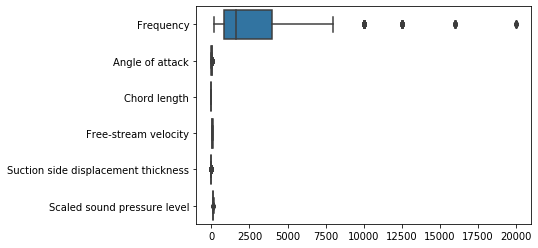

In [3]:
sns.boxplot(data = df_air, orient = 'h')

#### Способ масштабирования: нормализация

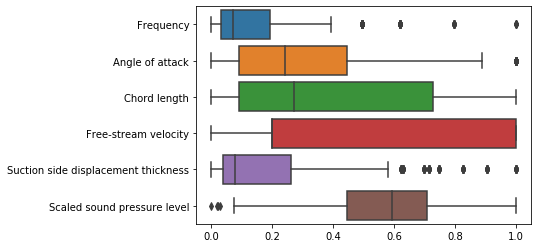

In [4]:
scaler = MinMaxScaler()
columns = df_air.columns
df_air[columns] = scaler.fit_transform(df_air[columns])
sns.boxplot(data = df_air, orient = 'h')

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

Невозможно выполнить замену категориальных признаков, так как их нет.

### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

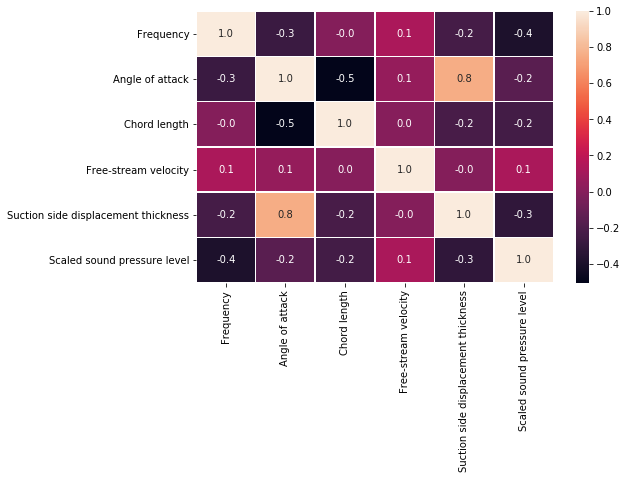

In [5]:
rcParams['figure.figsize'] = 8, 5
sns.heatmap(df_air.corr(), annot = True, fmt = '.1f', linewidths = .5)

Распределены равномерно.

### 6.	Заполните пропущенные значения в данных;

In [6]:
df_air.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

Пропущенных значений нет

### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Кодировка классификаторов:  
1 – линейная регрессия без использования регуляризаторов;  
3 – линейная регрессия, RIDGE регуляризатор;  

In [7]:
x = df_air.drop(['Scaled sound pressure level'], axis = 1)
y = df_air['Scaled sound pressure level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Линейная регрессия без использования регуляризаторов

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
pred = lin_reg.predict(x_test)

print(pred[:10] - y_test[:10])

968    -0.125511
9       0.023130
1468    0.204511
1150    0.307190
880    -0.078355
202     0.200853
122     0.042955
984     0.084259
688     0.128333
506     0.051152
Name: Scaled sound pressure level, dtype: float64


In [9]:
pearson = pearsonr(pred, y_test)
spearman = spearmanr(pred, y_test)

print("Корреляция Пирсона:", pearson)
if pearson[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')
    
print("Корреляция Спирмена:", spearman)
if spearman[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')

Корреляция Пирсона: (0.7476277680869188, 4.3677244934773564e-55)
Нормальное значение p-value
Корреляция Спирмена: SpearmanrResult(correlation=0.6873802556599415, pvalue=1.9871850841429884e-43)
Нормальное значение p-value


#### Линейная регрессия, RIDGE регуляризатор

In [10]:
rid = Ridge()
parameters_rid = {'alpha': np.linspace(1, 5, 25)}
grid_rid = GridSearchCV(rid, parameters_rid) 
grid_rid = grid_rid.fit(x_train, y_train)
alpha = grid_rid.best_estimator_.alpha

rid = Ridge(alpha = alpha)
rid.fit(x_train, y_train)
pred = rid.predict(x_test)

print(pred[:10] - y_test[:10])

968    -0.122697
9       0.027030
1468    0.207374
1150    0.305208
880    -0.077691
202     0.195651
122     0.046086
984     0.077707
688     0.130998
506     0.049600
Name: Scaled sound pressure level, dtype: float64


In [11]:
pearson = pearsonr(pred, y_test)
spearman = spearmanr(pred, y_test)

print("Корреляция Пирсона:", pearson)
if pearson[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')
    
print("Корреляция Спирмена:", spearman)
if spearman[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')

Корреляция Пирсона: (0.747671311054908, 4.272133107142636e-55)
Нормальное значение p-value
Корреляция Спирмена: SpearmanrResult(correlation=0.6859224219489122, pvalue=3.5083105150880674e-43)
Нормальное значение p-value
